In [1]:
import pandas as pd
pd.options.display.max_rows=1000
pd.options.display.max_columns=100

In [2]:
data = pd.read_csv('/home/pybokeh/Downloads/bike_counts.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-03-31 23:00:00,6.0,10.0
2019-03-31 22:00:00,7.0,14.0
2019-03-31 21:00:00,18.0,15.0
2019-03-31 20:00:00,26.0,31.0
2019-03-31 19:00:00,30.0,58.0


In [3]:
data.columns = ['West', 'East']
data.fillna(0, inplace=True)
data['Total'] = data['West'] + data['East']

In [4]:
data.head()

,West,East,Total
Date,,,
2019-03-31 23:00:00,6.0,10.0,16.0
2019-03-31 22:00:00,7.0,14.0,21.0
2019-03-31 21:00:00,18.0,15.0,33.0
2019-03-31 20:00:00,26.0,31.0,57.0
2019-03-31 19:00:00,30.0,58.0,88.0


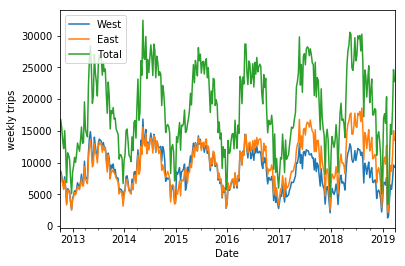

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data.resample('W').sum().plot()
plt.ylabel('weekly trips');

In [6]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour,
                           fill_value=0)
pivoted.head()

East                                                               \
Date         0  1  2  3  4   5   6    7    8    9   10  11  12  13   14   15   
2012-10-03    9  6  1  3  1  10  50   95  146  104  46  32  41  48   51   92   
2012-10-04   11  0  6  3  1  11  51   89  134   94  53  55  50  71   56   74   
2012-10-05    7  4  3  2  2   7  37  101  119   81  48  61  46  50   62   84   
2012-10-06    7  5  2  2  1   2  15   16   47   55  47  48  73  82  114   96   
2012-10-07    5  5  1  2  2   3   8   12   26   36  41  71  91  99  115  109   

                                               West                        \
Date         16   17   18   19  20  21  22  23   0   1  2  3  4   5    6    
2012-10-03  182  391  258   69  51  38  25  12    4   4  1  2  6  21  105   
2012-10-04  161  353  241  107  56  39  21  30    7   3  3  0  7  15   91   
2012-10-05  190  290  209   73  41  31  26  16    4   4  4  2  7  18   68   
2012-10-06   76   73   55   38  18  15  20  19    8  10  7  1  4   3   12   
2012-10-07   93   73   45   23  36  35   9  11    6  12  2  4  1   6    9   

                                                                              \
Date         7    8    9   10  11   12   13   14   15   16   17   18  19  20   
2012-10-03  257  291  172  72  10   35   42   77   72  133  192  122  59  29   
2012-10-04  230  284  147  67  53   54   55   63   73  114  154  137  57  27   
2012-10-05  218  251  131  71  43   55   62   63   80  120  144  107  42  27   
2012-10-06   17   58   59  68  76   91   95   89  115  107  107   41  40  25   
2012-10-07   14   43   67  67  94  100  129  126  122  132  118   68  26  19   

                        
Date        21  22  23  
2012-10-03  25  24   5  
2012-10-04  31  25  11  
2012-10-05  11  10  16  
2012-10-06  18  14  15  
2012-10-07  12   9   5

In [7]:
X = pivoted.values
X.shape

(2371, 48)

In [8]:
from sklearn.decomposition import PCA

In [9]:
Xpca = PCA(2).fit_transform(X)
Xpca.shape

(2371, 2)

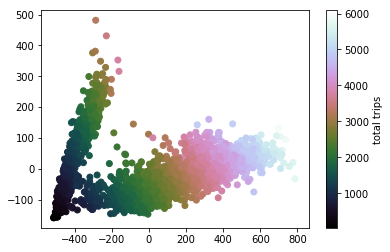

In [10]:
total_trips = X.sum(1)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=total_trips,
            cmap='cubehelix')
plt.colorbar(label='total trips');

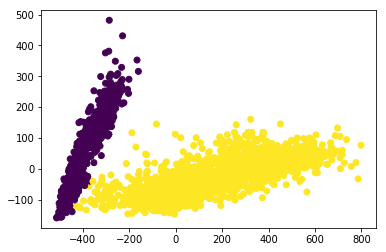

In [11]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2, covariance_type='full', random_state=0)
gmm.fit(Xpca)
cluster_label = gmm.predict(Xpca)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=cluster_label);

In [12]:
pivoted['Cluster'] = cluster_label

In [13]:
pivoted.head()

East                                                               \
Date          0  1  2  3  4   5   6    7    8    9  10  11  12  13   14   15   
2012-10-03    9  6  1  3  1  10  50   95  146  104  46  32  41  48   51   92   
2012-10-04   11  0  6  3  1  11  51   89  134   94  53  55  50  71   56   74   
2012-10-05    7  4  3  2  2   7  37  101  119   81  48  61  46  50   62   84   
2012-10-06    7  5  2  2  1   2  15   16   47   55  47  48  73  82  114   96   
2012-10-07    5  5  1  2  2   3   8   12   26   36  41  71  91  99  115  109   

                                               West                        \
Date         16   17   18   19  20  21  22  23    0   1  2  3  4   5    6   
2012-10-03  182  391  258   69  51  38  25  12    4   4  1  2  6  21  105   
2012-10-04  161  353  241  107  56  39  21  30    7   3  3  0  7  15   91   
2012-10-05  190  290  209   73  41  31  26  16    4   4  4  2  7  18   68   
2012-10-06   76   73   55   38  18  15  20  19    8  10  7  1  4   3   12   
2012-10-07   93   73   45   23  36  35   9  11    6  12  2  4  1   6    9   

                                                                              \
Date          7    8    9  10  11   12   13   14   15   16   17   18  19  20   
2012-10-03  257  291  172  72  10   35   42   77   72  133  192  122  59  29   
2012-10-04  230  284  147  67  53   54   55   63   73  114  154  137  57  27   
2012-10-05  218  251  131  71  43   55   62   63   80  120  144  107  42  27   
2012-10-06   17   58   59  68  76   91   95   89  115  107  107   41  40  25   
2012-10-07   14   43   67  67  94  100  129  126  122  132  118   68  26  19   

                       Cluster  
Date        21  22  23          
2012-10-03  25  24   5       1  
2012-10-04  31  25  11       1  
2012-10-05  11  10  16       1  
2012-10-06  18  14  15       0  
2012-10-07  12   9   5       0

In [14]:
data = data.join(pivoted['Cluster'], on=data.index.date)
data.head()

,West,East,Total,Cluster
Date,,,,
2019-03-31 23:00:00,6.0,10.0,16.0,0
2019-03-31 22:00:00,7.0,14.0,21.0,0
2019-03-31 21:00:00,18.0,15.0,33.0,0
2019-03-31 20:00:00,26.0,31.0,57.0,0
2019-03-31 19:00:00,30.0,58.0,88.0,0


In [15]:
by_hour = data.groupby(['Cluster', data.index.time]).mean()
by_hour.head()

West      East      Total
Cluster                                        
0       00:00:00  6.541384  9.105834  15.647218
        01:00:00  4.075984  5.081411   9.157395
        02:00:00  2.858887  3.123474   5.982361
        03:00:00  1.761194  1.698779   3.459973
        04:00:00  1.687924  2.245590   3.933514

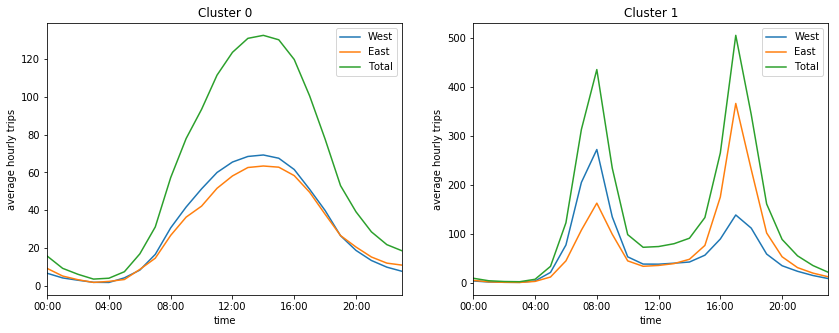

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)

for i in range(2):
    by_hour.loc[i].plot(ax=ax[i], xticks=hourly_ticks)
    ax[i].set_title('Cluster {0}'.format(i))
    ax[i].set_ylabel('average hourly trips')

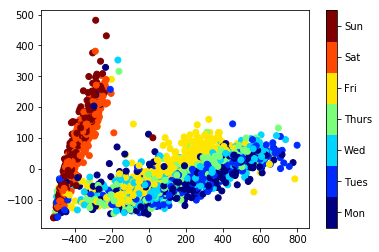

In [17]:
dayofweek = pd.to_datetime(pivoted.index).dayofweek
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.clim(-0.5, 6.5);